In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
path = "/oak/stanford/groups/mrivas/users/jolivier/repos/hla-assoc/"
outpath = path + "notebooks/output/dosage_exploration/"

In [2]:
hla_file = '/scratch/PI/mrivas/ukbb/24983/hla/ukb_hla_v2.txt'
data = pd.read_csv(hla_file, delim_whitespace = True, header = 0)
data = data.as_matrix()

# Set global variables

In [3]:
cut_out = 0
thresh = 0.1

# Functions for apply_along axis

In [4]:
def num_floats(column):
    non_ints = 0
    for x in np.nditer(column):
        if x % 1 != 0:
            non_ints += 1
    return non_ints

In [5]:

# return the number of entries that are outside some threshold around the integer responses
def outside_thresh(column, thresh):
    out_thresh = 0
    for x in np.nditer(column):
        if thresh < x and x < 1-thresh:
            out_thresh += 1
        elif 1 + thresh < x and x < 2 - thresh:
            out_thresh += 1
    return out_thresh

# Counting aspects of array

In [6]:
col_count = np.count_nonzero(data, axis=0)
print(col_count)

[165409    335    169 224160   1596   2818   8145   2567    543      7
   2149      4     43    207      6 126716   1725  58992    254     63
  18286  71410   1251     31    493     25  17086  21381     64    775
   1749  38473  11420  10597   1045  25255     14     43  33022   5935
   5457    154   1559    732     15     32   3090    223  29916   7135
     20    624   1599     41    247 128848   2224 124655    535  19206
  11025  25121  57677    749   1749     30     64     29    120    130
     12    991     14      5     50     13    784   2324   3414     17
     47    337    179     82    151     32      4      8     20  36352
     51    286     20   1869    135    179  36556      8    236  47129
   3772  10732      9    271   2357     49     26    184     68      1
     19     51     56     28     79  13811   9633    478   8580     19
      3     48   6577      2     62    337     13     62     10  50465
   8904      2   2293     25      9     27   2489   3542     14   1385
  9800

In [7]:
col_sum = np.sum(data, axis=0)
print(col_sum)

[  1.82799207e+05   3.15153333e+02   1.17660000e+02   2.56634393e+05
   1.56216000e+03   2.12868667e+03   8.14013333e+03   2.46106667e+03
   4.68600000e+02   4.00000000e+00   1.69794000e+03   2.61333333e+00
   4.27066667e+01   1.32933333e+02   3.04000000e+00   1.36215173e+05
   1.61117333e+03   6.07743667e+04   2.26326667e+02   5.51866667e+01
   1.85067933e+04   7.29470200e+04   9.05960000e+02   2.61333333e+01
   4.32433333e+02   2.07733333e+01   1.58398000e+04   2.08439867e+04
   5.05200000e+01   7.09886667e+02   1.60648000e+03   3.92344067e+04
   1.15647267e+04   1.04713933e+04   1.04734667e+03   2.54647800e+04
   6.75333333e+00   2.99266667e+01   3.34571000e+04   5.93764667e+03
   5.62520000e+03   1.63046667e+02   1.55787333e+03   7.35166667e+02
   8.93333333e+00   2.80000000e+01   3.09422000e+03   2.22013333e+02
   3.02284667e+04   7.18289333e+03   1.61066667e+01   5.46186667e+02
   1.62762000e+03   3.92000000e+01   2.45973333e+02   1.38090027e+05
   2.14702000e+03   1.33931287e+05

In [8]:
# Don't look at alleles we wouldn't use
print(data.shape)
#trimmed_mask = col_count > cut_out
#trimmed_data = data[:,trimmed_mask]
#print(trimmed_data)
#print(trimmed_data.shape)

trimmed_mask = col_sum > cut_out
trimmed_data = data[:,trimmed_mask]
print(trimmed_data.shape)
trimmed_col_count = col_count[trimmed_mask]

(488377, 362)
(488377, 362)


In [9]:
# get data for multiple thresholds

all_outside_thresh_1 = np.apply_along_axis(outside_thresh, 0, trimmed_data, 0.1)


In [10]:
all_outside_thresh_2 = np.apply_along_axis(outside_thresh, 0, trimmed_data, 0.2)


KeyboardInterrupt: 

In [16]:
all_outside_thresh_3 = np.apply_along_axis(outside_thresh, 0, trimmed_data, 0.3)


In [17]:
print(all_outside_thresh_1)

[  607    49   164  7171   148  2265   203   343   486  1614     2   179
   750   275  1041    94    21    82  3878   889    17   202    11  3005
  3182    50   170   403   116    26    95     2   469    25   179    52
    43    14    36    20    12    11     7   602    54    12   170    52
     2     5  1673   205  1238    31   752   270   373  5776    96   175
    17    57    26   111   121   156     3    84    76  2289     1   196
    58    66   147    31    11  2460    49   183  1139    33    50  1920
    83  6872  1768  2065   111  1406    45    23   179    68    51    49
    48   641  1236    61  3011     6    47   379    62   190    62  1158
  1738  1254    23    12   151    91    62  2536  1512   244   727   247
    85    71   108   336   230    48  4126    24    46    97   153   203
    30   781   383    81   507   183  2185    55   548   161   239   442
   115    28    59     1    53   168    61   176  1471    29  2342  2232
   309    17   522   399   554   912    85     3   

In [18]:
print(all_outside_thresh_2)

[  339    40   163  4380   122  1433    67   250   168  1187     0   163
   428   200   506    69    15    60  2194   730    13   157     8  1801
  1434    27   125    16    82     8    42     1   104    25    48    39
    38    13    29    11     8     8     3   435    42     7   156    39
     2     4  1144   160   732    26   596   183   301  4330    70   113
    14    47    23    91   120   126     3    65    60  1304     1   105
    44    62   134    29     7  1777    49   133  1033    23    38  1131
    73  4501   945  1418    87  1135    40    17   157    67    51    45
    38   521   945    44  1915     3    43   316    62   113    60   814
  1291  1138    18     9   122    63    49  1690  1022   195   621   203
    62    39    86   259   169    41  2790    21    31    68   111    75
    28   723   248    62   395   174  1969    49   403   115   188   399
    96    27    58     1    40   127    60   133  1411    19  1449  1413
   211    12   271   284   478   540    60     2   

In [19]:
print(all_outside_thresh_3)

[  214    34   114  2792    96  1031    38   174    60   460     0   133
   287   151   275    52     9    46  1123   627     5   107     7   939
   693    20    92     6    47     5    20     1    63    24    32    28
    31    10    26     6     6     7     1   290    26     6   146    25
     2     3   781   125   483    17   434   100   204  2974    44    75
    13    40    19    42   113    91     2    49    48   316     0    67
    27    45   110    27     7  1165    43    88   483    15    29   784
    60  2832   715   973    65   882    33    13   117    59    49    30
    35   401   712    29  1164     2    28   240    58    84    58   602
   813   810    11     8    93    44    40  1151   741   128   520   152
    42    23    57   175   109    36  1776    13    26    50    77    46
    16   631   166    44   270   147  1289    38   287    76   136   334
    71    22    53     1    33    90    52   103   745    12   872   910
   131     9   168   185   337   253    47     2   

In [20]:
trimmed_col_count = trimmed_col_count.astype(float)
prop_out_thresh_1 = np.divide(all_outside_thresh_1, trimmed_col_count)
prop_out_thresh_2 = np.divide(all_outside_thresh_2, trimmed_col_count)
prop_out_thresh_3 = np.divide(all_outside_thresh_3, trimmed_col_count)

# Plotting

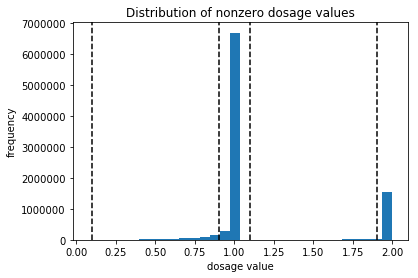

In [25]:
flat_data = trimmed_data.flatten()
nnz_flat_data = flat_data[np.nonzero(flat_data)]
plt.hist(nnz_flat_data, 30)
plt.axvline(x=0.9, c='k', ls = '--')
plt.axvline(x=1.1, c='k', ls = '--')
plt.axvline(x=1.9, c='k', ls = '--')
plt.axvline(x=0.1, c='k', ls = '--')
plt.xlabel('dosage value')
plt.ylabel('frequency')
plt.title('Distribution of nonzero dosage values')
plt.savefig(outpath + 'dist_nonzero_vals.png')
plt.show()



In [1]:
print(nnz_flat_data == 1)
nno_nnz_flat_data = nnz_flat_data[nnz_flat_data != 1]
nnt_nno_nnz_flat_data = nno_nnz_flat_data[nno_nnz_flat_data != 2]

plt.hist(nno_nnz_flat_data, 30)
plt.axvline(x=0.9)
plt.axvline(x=1.9)
plt.xlabel('dosage value')
plt.ylabel('frequency')
plt.title('Distribution of nonzero dosage values, 1 and 2 removed')
plt.show()

NameError: name 'nnz_flat_data' is not defined

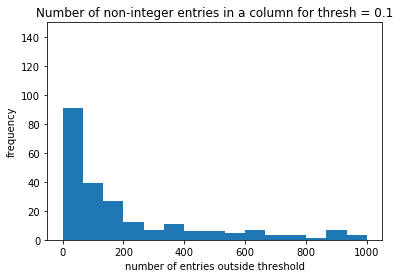

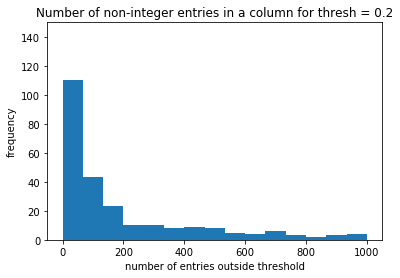

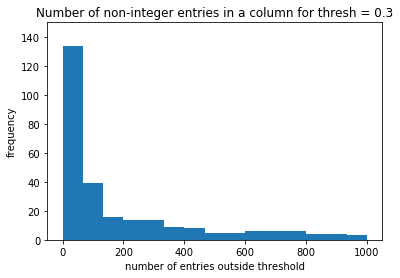

In [26]:
def thresh_hist(values, thresh):    
    plt.hist(values, 15, (0,1000))
    plt.title("Number of non-integer entries in a column for thresh = " + str(thresh))
    plt.xlabel("number of entries outside threshold")
    plt.ylabel('frequency')
    plt.ylim([0,150])
    plt.show()

thresh_hist(all_outside_thresh_1, 0.1)
thresh_hist(all_outside_thresh_2, 0.2)
thresh_hist(all_outside_thresh_3, 0.3)


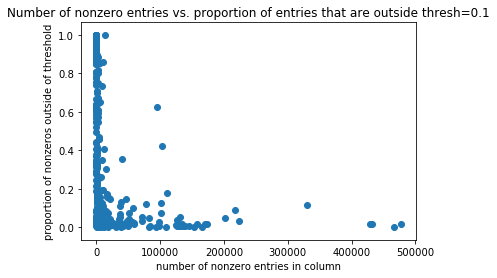

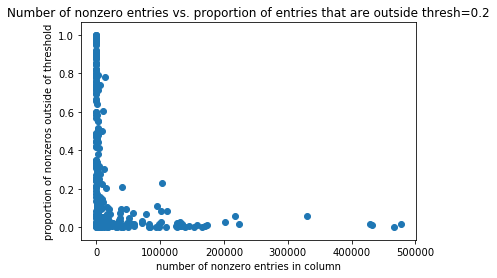

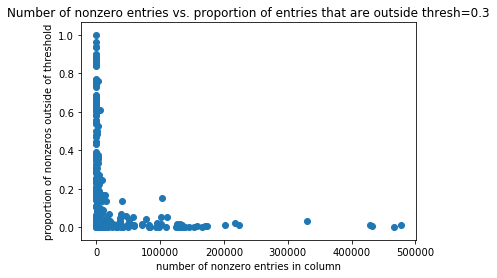

In [24]:

def thresh_scatter(values, thresh):
    plt.scatter(trimmed_col_count, values)
    plt.xlabel('number of nonzero entries in column')
    plt.ylabel('proportion of nonzeros outside of threshold')
    plt.title('Number of nonzero entries vs. proportion of entries that are outside thresh=' + str(thresh))
    #plt.xlim([0,30000])
    plt.show()
    
thresh_scatter(prop_out_thresh_1, 0.1)
thresh_scatter(prop_out_thresh_2, 0.2)
thresh_scatter(prop_out_thresh_3, 0.3)


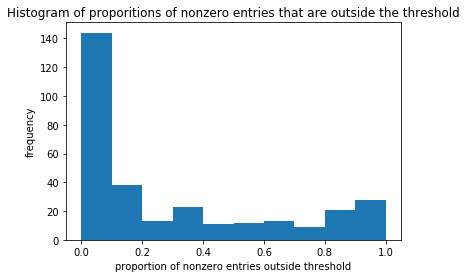

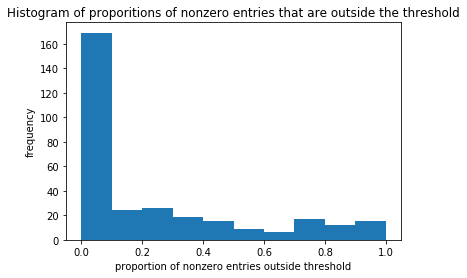

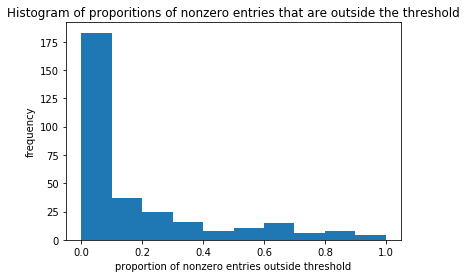

In [27]:
def prop_thresh_hist(values, thresh):
    plt.hist(values)
    plt.title('Histogram of proporitions of nonzero entries that are outside the threshold')
    plt.ylabel('frequency')
    plt.xlabel('proportion of nonzero entries outside threshold')
    plt.show()
    
prop_thresh_hist(prop_out_thresh_1, 0.1)
prop_thresh_hist(prop_out_thresh_2, 0.2)
prop_thresh_hist(prop_out_thresh_3, 0.3)

# Testing

In [125]:
test_outside_thresh = np.array([1.5,2,0,0,0,0.7,0,1,0])
print(test_outside_thresh)

print(outside_thresh(test_outside_thresh, 0.2))

test_all_thresh = np.apply_along_axis(outside_thresh, 0, test_outside_thresh, 0.4)
print(test_all_thresh)

[ 1.5  2.   0.   0.   0.   0.7  0.   1.   0. ]
theta: 0.2
x: 1.5
range: 1.2 to 1.8
(1,2): 1.5
x: 2.0
x: 0.0
x: 0.0
x: 0.0
x: 0.7
(0,1): 0.7
x: 0.0
x: 1.0
x: 0.0
2
theta: 0.4
x: 1.5
range: 1.4 to 1.6
(1,2): 1.5
x: 2.0
x: 0.0
x: 0.0
x: 0.0
x: 0.7
x: 0.0
x: 1.0
x: 0.0
1


In [98]:
all_non_ints = np.apply_along_axis(num_floats, 0, trimmed_data)
print(all_non_ints)

KeyboardInterrupt: 

In [66]:
all_outside_thresh = np.apply_along_axis(outside_thresh, 0, trimmed_data, thresh)
print(all_outside_thresh)

[  607    49   164  7171   148  2265   203   343   486     6  1614     4
     2   179     6   750   275  1041    94    21    82  3878   889    17
   202    11  3005  3182    50   170   403   116    26    95     2   469
    14    25   179    52    43    14    36    20    15    12    11     7
   602    54    12   170    52     2     5  1673   205  1238    31   752
   270   373  5776    96   175    17    57    26   111   121     9   156
    14     5     3     9    84    76  2289    13     1   196    58    66
   147    31     4     8    11  2460    49   183    20  1139    33    50
  1920     0    83  6872  1768  2065     9   111  1406    45    23   179
    68     1    17    51    49    26    48   641  1236    61  3011     6
     0    47   379     2    62   190     9    62     6  1158  1738     2
  1254    23     9    12   151    91    13    62  2536  1512   244   727
     6   247    85    71   108     7     2   336   230    48  4126    24
    46    97   153   203    30   781   383    81   